# Load Data and Preprocessing

In [9]:
import pandas as pd
import os
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

# Set the default DPI
plt.rcParams['figure.dpi'] = 100  

well_info = pd.read_csv('well-loc.tsv', sep='\t')

# Path to the sensor data directory
sensor_data_path = 'sensor-data'

# List all TSV files in the directory
sensor_data_files = [f for f in os.listdir(sensor_data_path) if f.endswith('.tsv')]

# Sort the sensor_data_files list
sensor_data_files.sort(key= lambda x: int(x.split('.')[0]))

# Load and concatenate all sensor data files into one DataFrame
sensor_data_list = [pd.read_csv(os.path.join(sensor_data_path, file), sep='\t',
                                na_values="-9999") for file in sensor_data_files]

# Remove the data point with NaN value
well_info = well_info.dropna()
for sensor_data in sensor_data_list:
    sensor_data.dropna(inplace=True)

# Reset the index of the well_loc DataFrame to Well, X, Y
well_info.rename(columns={'井': 'Well'}, inplace=True)

# Reset the index of the sensor data DataFrame to Depth, Porosity, Hydrate Saturation
for idx, _ in enumerate(sensor_data_list):
	sensor_data_list[idx].columns = ['Depth', 'Porosity', 'Hydrate Saturation']

print(well_info.head())  # Display the first few rows to verify it's loaded correctly
print(sensor_data_list[0].head())  # Display the first few rows to verify it's loaded correctly

  Well      X      Y
0  w01  34500  45000
1  w02  36000  45050
2  w03  37050  45020
3  w04  37880  46000
4  w05  35000  46030
         Depth  Porosity  Hydrate Saturation
112  1832.0004    0.5236              0.0237
113  1832.1528    0.5208              0.0175
114  1832.3052    0.5196              0.0000
115  1832.4576    0.5156              0.0000
116  1832.6100    0.4971              0.0000


Descriptive Statistics for Well Information:
                  X             Y
count     14.000000     14.000000
mean   35729.285714  47391.428571
std     1281.072053   1859.341724
min    34000.000000  45000.000000
25%    34670.000000  46007.500000
50%    35750.000000  47215.000000
75%    36150.000000  49107.500000
max    38000.000000  50000.000000

Descriptive Statistics for Sensor Data:

Sensor Data File 1:
             Depth     Porosity  Hydrate Saturation
count  1609.000000  1609.000000         1609.000000
mean   1954.530000     0.489345            0.001296
std      70.808485     0.041344            0.006527
min    1832.000400     0.391800            0.000000
25%    1893.265200     0.461000            0.000000
50%    1954.530000     0.490300            0.000000
75%    2015.794800     0.519800            0.000000
max    2077.059600     0.604700            0.088900

Sensor Data File 2:
            Depth     Porosity  Hydrate Saturation
count  1408.00000  1408.000000         1408.000

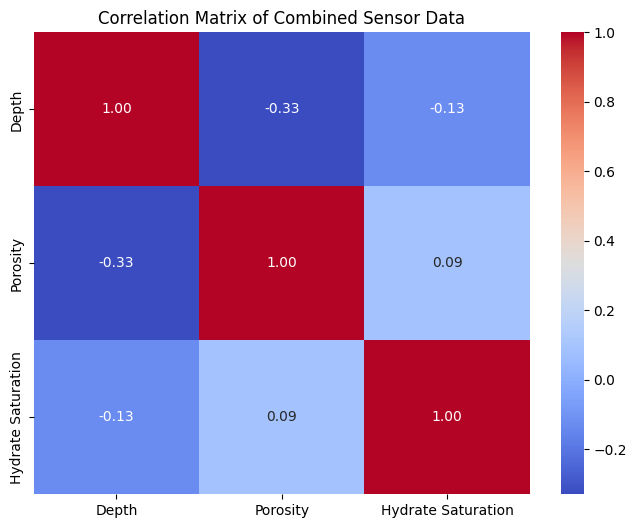

In [12]:
# Show the summary of the dataset
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns  # For enhanced visualizations

# Assuming previous code has already been run and data is loaded

# 1. Descriptive Statistics
print("Descriptive Statistics for Well Information:")
print(well_info.describe())
print("\nDescriptive Statistics for Sensor Data:")
for idx, sensor_data in enumerate(sensor_data_list):
    print(f"\nSensor Data File {idx + 1}:")
    print(sensor_data.describe())

# 2. Data Quality Checks
print("\nChecking for missing values in Well Information:")
print(well_info.isnull().sum())
print("\nChecking for missing values in Sensor Data:")
for idx, sensor_data in enumerate(sensor_data_list):
    print(f"\nSensor Data File {idx + 1} Missing Values:")
    print(sensor_data.isnull().sum())

print("\nChecking for duplicate rows in Well Information:")
print(well_info.duplicated().sum())
for idx, sensor_data in enumerate(sensor_data_list):
    print(f"\nSensor Data File {idx + 1} Duplicate Rows:")
    print(sensor_data.duplicated().sum())

# 3. Correlation Analysis
# Assuming sensor data has common columns that can be concatenated for correlation analysis
if len(sensor_data_list) > 0:
    combined_sensor_data = pd.concat(sensor_data_list, ignore_index=True)
    plt.figure(figsize=(8, 6))
    sns.heatmap(combined_sensor_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix of Combined Sensor Data')
    plt.show()

# Note: Ensure all plots are properly displayed
plt.show()


In [ ]:
# Calculate the percentage of the data points contains the negative value in sensor data
negative_data = []
for idx, sensor_data in enumerate(sensor_data_list):
    condition = (sensor_data['Porosity'] < 0) | (sensor_data['Hydrate Saturation'] < 0)
    negative_data.append(len(sensor_data[condition]) / len(sensor_data))

# Plot the number of negative data points
fig = go.Figure(data=[go.Bar(x=sensor_data_files, y=negative_data)])
fig.update_layout(title_text='Number of negative data points in each sensor data file')
fig.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the sensor data
scaler = MinMaxScaler()
for idx, sensor_data in enumerate(sensor_data_list):
    sensor_data[['Porosity', 'Hydrate Saturation']] = scaler.fit_transform(sensor_data[['Porosity', 'Hydrate Saturation']])

In [ ]:
# Calculate the percentage of the data points contains the negative value in sensor data
negative_data = []
for idx, sensor_data in enumerate(sensor_data_list):
    condition = (sensor_data['Porosity'] < 0) | (sensor_data['Hydrate Saturation'] < 0)
    negative_data.append(len(sensor_data[condition]) / len(sensor_data))

# Plot the number of negative data points
fig = go.Figure(data=[go.Bar(x=sensor_data_files, y=negative_data)])
fig.update_layout(title_text='Number of negative data points in each sensor data file')
fig.show()
